In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#pip install tensorflow

In [3]:
from keras.models import Sequential

In [4]:
import pickle

In [5]:
import json 

In [6]:
df = pd.read_csv("C:/Users/MERIEM/Desktop/FacebookBot/IAModel/serveybot.csv")

pd.pandas.set_option('display.max_columns',None)

In [7]:
display("Peeking into Data", df)

'Peeking into Data'

,Knowing,tunisian,bachelor,credit,speakEnglish,SpeakFrensh,Programming,B3,CIN,single,married,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60,Gender_Female,Gender_Male,Gender_Transgender,moy_Mild,moy_Moderate,Contact_Sup,accepted_Yes,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [8]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 26


In [9]:
display("Description",df.describe())

'Description'

,Knowing,tunisian,bachelor,credit,speakEnglish,SpeakFrensh,Programming,B3,CIN,single,married,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60,Gender_Female,Gender_Male,Gender_Transgender,moy_Mild,moy_Moderate,Contact_Sup,accepted_Yes,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Knowing             316800 non-null  int64
 1   tunisian            316800 non-null  int64
 2   bachelor            316800 non-null  int64
 3   credit              316800 non-null  int64
 4   speakEnglish        316800 non-null  int64
 5   SpeakFrensh         316800 non-null  int64
 6   Programming         316800 non-null  int64
 7   B3                  316800 non-null  int64
 8   CIN                 316800 non-null  int64
 9   single              316800 non-null  int64
 10  married             316800 non-null  int64
 11  Age_0-9             316800 non-null  int64
 12  Age_10-19           316800 non-null  int64
 13  Age_20-24           316800 non-null  int64
 14  Age_25-59           316800 non-null  int64
 15  Age_60              316800 non-null  int64
 16  Gender_Female       

In [11]:
Contact_columns = df.filter(like='Contact_').columns

In [12]:
df['Contact_No'].replace({1:'refused',0:'No'},inplace =True)
df['Contact_Yes'].replace({1:'acepted',0:'No'},inplace =True)
df['Contact_Dont-Know'].replace({1:'waitingResponse',0:'No'},inplace =True)
df['Contact_Sup'].replace({1:'sup',0:'No'},inplace =True)

In [13]:
df['Condition']=df[Contact_columns].values.tolist()

In [14]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [15]:
df['Condition'] = df['Condition'].apply(removing)

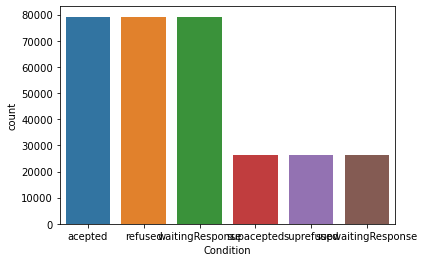

In [16]:
sns.countplot(df['Condition'])
plt.show()

In [17]:
df.drop(Contact_columns,axis=1,inplace=True)

In [18]:
df['admission_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [19]:
df.shape

(316800, 24)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

In [21]:
df

,Knowing,tunisian,bachelor,credit,speakEnglish,SpeakFrensh,Programming,B3,CIN,single,married,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60,Gender_Female,Gender_Male,Gender_Transgender,moy_Mild,moy_Moderate,accepted_Yes,Condition,admission_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,5,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,5,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,2,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,3,0


In [22]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from keras.models import model_from_json
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [26]:
# load json and create model
#json_file = open('model_num.json', 'r')

#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)

# load weights into new model
#loaded_model.load_weights("model_num.h5")
#print("Loaded model from disk")

#loaded_model.save('model_num.hdf5')
#loaded_model=load_model('model_num.hdf5')

In [27]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [28]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_model = pickle.load(file)

Pickled_model

LogisticRegression()

In [29]:
#score = Pickled_model.score(X_train, y_train)
#print("Test score: {0:.2f} %".format(100 * score))  
#Ypredict = Pickled_model.predict(X_test)  

#Ypredict

In [30]:
import joblib

In [31]:
 
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

In [32]:
# Save RL_Model to file in the current working directory

joblib_file = "joblib_model.pkl"  
joblib.dump(model, joblib_file)

['joblib_model.pkl']

In [33]:
joblib_model = joblib.load(joblib_file)


joblib_model

LogisticRegression()

In [34]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [35]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = joblib_model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = joblib_model.predict(X_test)  



Test score: 32.20 %


In [36]:
class MyLogReg(LogisticRegression):

    # Override the class constructor
    def __init__(self, C=1.0, solver='lbfgs', max_iter=100, X_train=None, y_train=None):
        LogisticRegression.__init__(self, C=C, solver=solver, max_iter=max_iter)
        self.X_train = X_train
        self.y_train = y_train

    # A method for saving object data to JSON file
    def save_json(self, filepath):
        dict_ = {}
        dict_['C'] = self.C
        dict_['max_iter'] = self.max_iter
        dict_['solver'] = self.solver
        dict_['X_train'] = self.X_train.tolist() if self.X_train is not None else 'None'
        dict_['y_train'] = self.y_train.tolist() if self.y_train is not None else 'None'

        # Creat json and save to file
        json_txt = json.dumps(dict_, indent=4)
        with open(filepath, 'w') as file:
            file.write(json_txt)

    # A method for loading data from JSON file
    def load_json(self, filepath):
        with open(filepath, 'r') as file:
            dict_ = json.load(file)

        self.C = dict_['C']
        self.max_iter = dict_['max_iter']
        self.solver = dict_['solver']
        self.X_train = np.asarray(dict_['X_train']) if dict_['X_train'] != 'None' else None
        self.y_train = np.asarray(dict_['y_train']) if dict_['y_train'] != 'None' else None

In [37]:
filepath = "mylogreg.json"

# Create a model and train it
mylogreg = MyLogReg(X_train=y_train, y_train=y_train)  
mylogreg.save_json(filepath)

# Create a new object and load its data from JSON file
json_mylogreg = MyLogReg()  
json_mylogreg.load_json(filepath)  
json_mylogreg  

MyLogReg(X_train=array([0, 5, 1, ..., 1, 4, 5]),
         y_train=array([0, 5, 1, ..., 1, 4, 5]))

In [38]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred)*350,2)

112.69

In [40]:
Xnew = [[1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], Predicted=1
